## Загрузка и обработка данных

In [1]:
# импортируем все необходимые библиотеки:
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# загружаем датасет
data = pd.read_csv('ds_salaries.csv', index_col=0)
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
# задаём уровень значимости
alpha = 0.05 
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


In [4]:
# Проверим данные на наличие пропусков:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


В данных 607 записей, пропусков нет.  
Также мы можем увидеть, что в данных есть 3 числовых признаков: salary, salary_in_usd, work_year и 8 категориальных:
experience_level, job_title, salary_currency, employee_residence, company_location, remote_ratio

In [5]:
# Проверим данные на наличие полных дубликатов:
print(f'Количество дубликатов: {data[data.duplicated()].shape[0]}')

# Удаляем дубликаты:
data = data.drop_duplicates()
print(f'Размер таблицы после удаления дубликатов: {data.shape}')

Количество дубликатов: 42
Размер таблицы после удаления дубликатов: (565, 11)


In [6]:
# удалим признаки salary и salary_currency, т.к. у нас есть признак salary_usd, в котором данные уже переведены в одну валюту,
# соответственно нам не нужна зарплата в исходной валюте, а также сама валюта
data = data.drop(['salary', 'salary_currency'], axis = 1)

<Axes: >

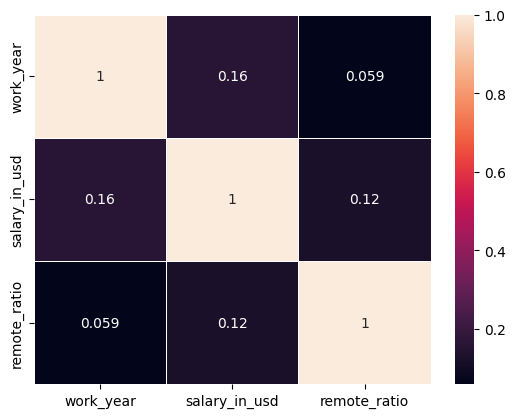

In [7]:
# посмотрим на корреляцию всех признаков между собой:
sns.heatmap(data.corr(numeric_only=True), annot=True, linewidths=.5)

Мы видим, что признаков с очень сильной связью нет, так что на данном этапе ничего не удаляем.  

In [8]:
# посмотрим статические характеристики наших данных:
data.describe()

,work_year,salary_in_usd,remote_ratio
count,565.000000,565.000000,565.000000
mean,2021.364602,110610.343363,69.911504
std,0.698138,72280.702792,40.900666
min,2020.000000,2859.000000,0.000000
25%,2021.000000,60757.000000,50.000000
50%,2021.000000,100000.000000,100.000000
75%,2022.000000,150000.000000,100.000000
max,2022.000000,600000.000000,100.000000


## Визуальный анализ данных

<Axes: >

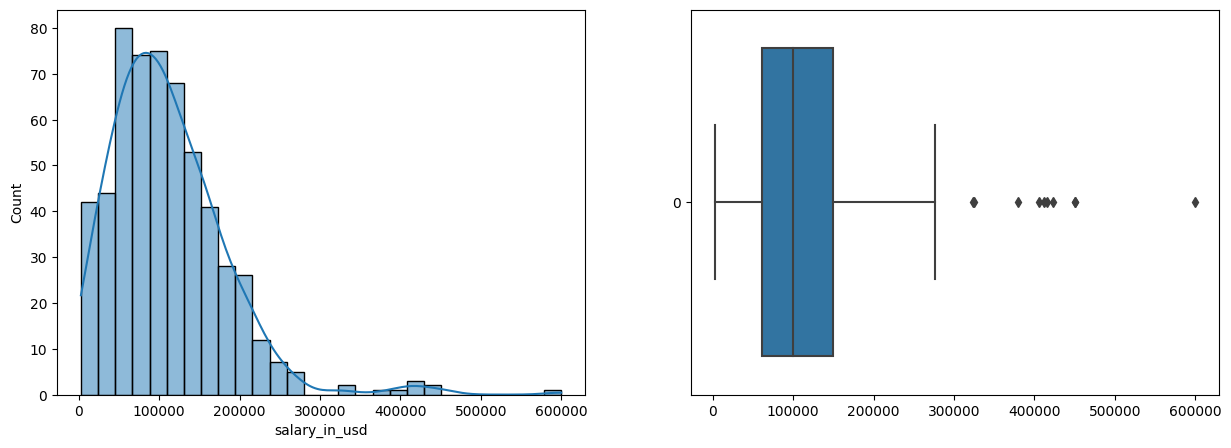

In [13]:
# для начала построим гистограммы и посмотрим на распределение всех числовых признаков:
# для признака salary_in_usd
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data['salary_in_usd'], kde=True, ax=axes[0])
sns.boxplot(data['salary_in_usd'], ax=axes[1], orient='h')

Мы видим, что медиана зарплаты в наших данных приходится на 100000 долларов. Распределение не нормальное. Имеются выбросы, но их не много.

In [ ]:
# для признака remote_ratio
